<h1>HR Analytics - Job Change of Data Scientist<br><hr>
   <p style = "font-size:12px">Reference: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists<p>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from multiprocessing import Queue
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import os
print(os.listdir("C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics"))

['.ipynb_checkpoints', 'Assignment 1', 'Assignment 2', 'Assignment 3', 'aug_test.csv', 'aug_train.csv', 'HR Analytics - Data Scientist Job Change.ipynb', 'HR Analytics.zip', 'Midterm Exam', 'mongodb pw.docx', 'sample_submission.csv']


<h2>Training Data<h2> 

In [2]:
train = pd.read_csv(r"C:/Users/PornpatSamartlertdee/Desktop/TNI/DSA-304 Big Data Analytics/aug_train.csv", encoding = "unicode_escape")
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,10-49,Pvt Ltd,>4,18,0
1,4866,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,10-49,Early Stage Startup,2,206,0
2,13854,city_104,0.924,Male,Has relevent experience,no_enrollment,High School,NaN,4,10-49,Pvt Ltd,2,36,0
3,25103,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,10-49,Pvt Ltd,1,21,0
4,13478,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,2,10-49,Funded Startup,NaN,32,1


<h2>Features<h2>
<p style="font-size:16px;">- enrollee_id : Unique ID for enrollee<br>
- city: City code<br>
- citydevelopmentindex: Developement index of the city (scaled)<br>
- gender: Gender of enrolee<br>
- relevent_experience: Relevent experience of enrolee<br>
- enrolled_university: Type of University course enrolled if any<br>
- education_level: Education level of enrolee<br>
- major_discipline :Education major discipline of enrolee<br>
- experience: Enrolee total experience in years<br>
- company_size: No of employees in current employer's company</p>

In [3]:
display(train[['city','city_development_index','relevent_experience','gender','education_level','major_discipline','experience','company_size','company_type','target']]
        .groupby(['experience','company_size'])
        .agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges"))
#Ref: Kaggle, khotijahs1

Text(0.5, 1.0, 'Distributional of training_hours')

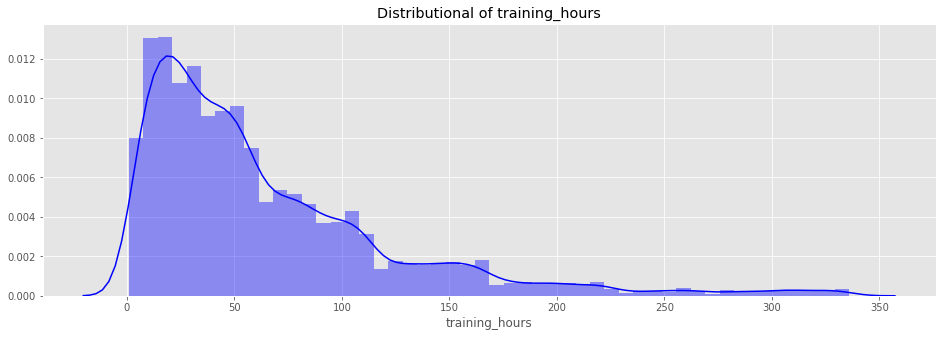

In [4]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(train["training_hours"], color="blue",ax = axes)
plt.title("Distributional of training_hours")
#Ref: Kaggle, khotijahs1

<h3>Categorical data to Numerical data<h3>

In [5]:
train['gender'] = pd.factorize(train['gender'])[0]
train['relevent_experience'] = pd.factorize(train['relevent_experience'])[0]
train['enrolled_university'] = pd.factorize(train['enrolled_university'])[0]
train['education_level'] = pd.factorize(train['education_level'])[0]
train['major_discipline'] = pd.factorize(train['major_discipline'])[0]
train['experience'] = pd.factorize(train['experience'])[0]
train['company_size'] = pd.factorize(train['company_size'])[0]
train['company_type'] = pd.factorize(train['company_type'])[0]
train['last_new_job'] = pd.factorize(train['last_new_job'])[0]
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,6588,city_114,0.926,0,0,0,0,0,0,0,0,0,18,0
1,4866,city_103,0.920,0,0,0,0,0,1,0,1,1,206,0
2,13854,city_104,0.924,0,0,0,1,-1,2,0,0,1,36,0
3,25103,city_83,0.923,0,0,0,0,0,3,0,0,2,21,0
4,13478,city_21,0.624,-1,0,1,0,0,4,0,2,-1,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,155,city_44,0.725,-1,1,1,0,0,5,-1,0,5,190,0
19154,11385,city_149,0.689,0,1,1,0,-1,4,-1,-1,2,60,0
19155,7386,city_173,0.878,0,1,0,0,5,11,-1,-1,2,42,1
19156,31398,city_103,0.920,0,0,0,0,0,11,-1,-1,3,52,1


<h2>Replace Missing values with average<h2>

In [6]:
# Replace Missing value with average
train = train.replace(-1, np.NaN)
train = train.replace(np.NaN, train.mean())
train.fillna(train.mean())
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,6588,city_114,0.926,0.00000,0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,18,0
1,4866,city_103,0.920,0.00000,0,0.0,0.0,0.000000,1.0,0.00000,1.000000,1.000000,206,0
2,13854,city_104,0.924,0.00000,0,0.0,1.0,0.400673,2.0,0.00000,0.000000,1.000000,36,0
3,25103,city_83,0.923,0.00000,0,0.0,0.0,0.000000,3.0,0.00000,0.000000,2.000000,21,0
4,13478,city_21,0.624,0.11058,0,1.0,0.0,0.000000,4.0,0.00000,2.000000,2.050867,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,155,city_44,0.725,0.11058,1,1.0,0.0,0.000000,5.0,3.72708,0.000000,5.000000,190,0
19154,11385,city_149,0.689,0.00000,1,1.0,0.0,0.400673,4.0,3.72708,0.660086,2.000000,60,0
19155,7386,city_173,0.878,0.00000,1,0.0,0.0,5.000000,11.0,3.72708,0.660086,2.000000,42,1
19156,31398,city_103,0.920,0.00000,0,0.0,0.0,0.000000,11.0,3.72708,0.660086,3.000000,52,1


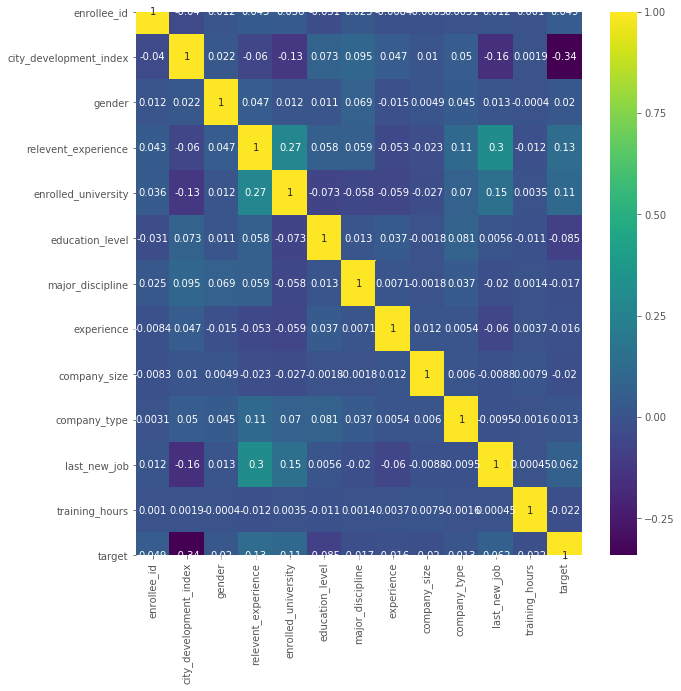

In [7]:
corrmatrix = train.corr()
corrmatrix
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmatrix,annot=True,cmap='viridis')

<h2>Linear Regression<h2>

In [32]:
# 3) Perform Linear Regression
X = train.drop(train[["city","target"]],axis=1)
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
regr_model = linear_model.LinearRegression()
regr_model.fit(X_train, y_train)
prediction = regr_model.predict(X_test)

In [69]:
y_pred = model.predict(X_test)
print(y_pred)

[[0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 ...
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]]


In [68]:
residuals = y_test - prediction
print("Coefficient of Determintaion is "+str(r2_score(y_test, prediction)))
print("Training accuracy: ", regr_model.score(X_train, y_train))

y_pred = regr_model.predict(X_test)

print("Testing accuracy: ", regr_model.score(X_test, y_test))

regr_model = np.sqrt(mean_squared_error(y_pred, y_test))
m1_rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: ",m1_rmse)

Coefficient of Determintaion is 0.13514054375443063
Training accuracy:  0.1373498509442388
Testing accuracy:  0.13514054375443063
RMSE:  0.40399165359230627


<h2>Random Forest Regression<h2>

In [10]:
# 4) Perform Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=12)
forest_reg.fit(X_train, y_train)
print("Training accuracy: ", forest_reg.score(X_train, y_train))

y_pred = forest_reg.predict(X_test)

print("Testing accuracy: ", forest_reg.score(X_test, y_test))

forest_rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("RMSE: ",forest_rmse)

Training accuracy:  0.8884311089613333
Testing accuracy:  0.20069513219599144
RMSE:  0.3883791013615319


In [70]:
y_pred = model.predict(X_test)
print(y_pred)

[[0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 ...
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]
 [0.24708603 0.24713105 0.24706353 ... 0.         0.         0.        ]]


<h2>Neural Network<h2>

In [74]:
model = Sequential()
model.add(Dense(14, input_dim=12, activation='sigmoid'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
420/420 [==============================] - 1s 1ms/step - loss: 0.5995
Epoch 2/30
420/420 [==============================] - 0s 1ms/step - loss: 0.1876
Epoch 3/30
420/420 [==============================] - 0s 956us/step - loss: 0.1905
Epoch 4/30
420/420 [==============================] - 0s 1ms/step - loss: 0.1867
Epoch 5/30
420/420 [==============================] - 0s 1ms/step - loss: 0.1851
Epoch 6/30
420/420 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 7/30
420/420 [==============================] - 1s 1ms/step - loss: 0.1883
Epoch 8/30
420/420 [==============================] - 0s 945us/step - loss: 0.1865
Epoch 9/30
420/420 [==============================] - 0s 938us/step - loss: 0.1875
Epoch 10/30
420/420 [==============================] - 0s 946us/step - loss: 0.1866
Epoch 11/30
420/420 [==============================] - 0s 970us/step - loss: 0.1855
Epoch 12/30
420/420 [==============================] - 0s 962us/step - loss: 0.1858
Epoch 13/30
4

In [76]:
performance = model.evaluate(X_test, y_test)
print(performance)
y_pred = model.predict(X_test)
print(y_pred)

180/180 [==============================] - 0s 722us/step - loss: 0.1887
0.18870286643505096
[[0.252667]
 [0.252667]
 [0.252667]
 ...
 [0.252667]
 [0.252667]
 [0.252667]]
